<a href="https://colab.research.google.com/github/jaguzman/FundamentosEnHerramientasDeTransformacionDigital/blob/master/Unidad%203%20-%20Aprendizaje%20de%20m%C3%A1quinas/5_Aprendizaje%20Profundo/AprendizajeProfundo_Keras_CalidadDeVino.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor as mlp_r
from sklearn.neural_network import MLPClassifier as mlp_c
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn import datasets

# Import required libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn

# Import necessary modules
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Keras specific
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical 

In [ ]:
# import data
data = pd.read_csv("https://raw.githubusercontent.com/jaguzman/dataSets/master/datasets/winequality-red.csv",
    sep = ',',         # separador de campos
    thousands = None,  # separador de miles para números
    decimal = '.')     # separador de los decimales para números
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [ ]:
# X = (data.iloc[:,:-1]).as_matrix()
# y = (data.iloc[:,-1]).as_matrix()

target_column = ['quality'] 
predictors = list(set(list(data.columns))-set(target_column))
data[predictors] = data[predictors]/data[predictors].max()
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.523248,0.334064,0.270976,0.163794,0.143153,0.220485,0.160788,0.993082,0.825714,0.329074,0.699529,5.636023
std,0.109503,0.113329,0.194801,0.090963,0.077030,0.145280,0.113825,0.001880,0.038500,0.084753,0.071521,0.807569
min,0.289308,0.075949,0.000000,0.058065,0.019640,0.013889,0.020761,0.986430,0.683292,0.165000,0.563758,3.000000
25%,0.446541,0.246835,0.090000,0.122581,0.114566,0.097222,0.076125,0.991940,0.800499,0.275000,0.637584,5.000000
50%,0.496855,0.329114,0.260000,0.141935,0.129296,0.194444,0.131488,0.993086,0.825436,0.310000,0.684564,6.000000
75%,0.578616,0.405063,0.420000,0.167742,0.147300,0.291667,0.214533,0.994167,0.847880,0.365000,0.744966,6.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


In [ ]:
X = data[predictors].values
y = data[target_column].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)
print(X_train.shape); print(X_test.shape)

(1119, 11)
(480, 11)


In [ ]:
# one hot encode outputs
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

count_classes = y_test.shape[1]
print(count_classes)

9


In [ ]:
# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(12, activation='relu', input_shape=(11,)))

# Add one hidden layer 
model.add(Dense(8, activation='relu'))

# Add an output layer 
model.add(Dense(9, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=20, batch_size=1, verbose=1)

Epoch 1/20
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2751 - accuracy: 0.8712
Epoch 2/20
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2198 - accuracy: 0.8884
Epoch 3/20
1119/1119 [==============================] - 1s 967us/step - loss: 0.2188 - accuracy: 0.8887
Epoch 4/20
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2183 - accuracy: 0.8889
Epoch 5/20
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2173 - accuracy: 0.8894
Epoch 6/20
1119/1119 [==============================] - 1s 1ms/step - loss: 0.2160 - accuracy: 0.8916
Epoch 7/20
1119/1119 [==============================] - 1s 978us/step - loss: 0.2155 - accuracy: 0.8905
Epoch 8/20
1119/1119 [==============================] - 1s 969us/step - loss: 0.2141 - accuracy: 0.8923
Epoch 9/20
1119/1119 [==============================] - 1s 970us/step - loss: 0.2116 - accuracy: 0.8952
Epoch 10/20
1119/1119 [==============================] - 1s 995us/step - l

In [ ]:
pred_train= model.predict(X_train)
scores = model.evaluate(X_train, y_train, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores[1], 1 - scores[1]))   
 
pred_test= model.predict(X_test)
scores2 = model.evaluate(X_test, y_test, verbose=0)
print('Accuracy on test data: {}% \n Error on test data: {}'.format(scores2[1], 1 - scores2[1]))  

Accuracy on training data: 0.9046768546104431% 
 Error on training data: 0.09532314538955688
Accuracy on test data: 0.8995370268821716% 
 Error on test data: 0.10046297311782837


**Evaluar diferentes modelos**

In [ ]:
from sklearn.metrics import mean_squared_error

capa_1 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
capa_2 = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

scoreM = np.zeros((len(capa_1),len(capa_1)))
for j, n_1 in enumerate(capa_1):
    for k, n_2 in enumerate(capa_2):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

        # one hot encode outputs
        y_train = to_categorical(y_train)
        y_test = to_categorical(y_test)

        model = Sequential()
        model.add(Dense(n_1, activation='relu', input_shape=(11,)))
        model.add(Dense(n_2, activation='relu'))
        model.add(Dense(9, activation='sigmoid'))
        model.compile(loss='binary_crossentropy',
                      optimizer='adam',
                      metrics=['accuracy'])
                          
        model.fit(X_train, y_train, epochs=3) #, batch_size=10, verbose=1)

        pred_test= model.predict(X_test)
        score = model.evaluate(X_test, y_test) #, verbose=0)
        scoreM[j, k] = score[1]
        

Epoch 1/3
1071/1071 [==============================] - 0s 115us/step - loss: 0.6871 - accuracy: 0.8889
Epoch 2/3
1071/1071 [==============================] - 0s 35us/step - loss: 0.6744 - accuracy: 0.8889
Epoch 3/3
528/528 [==============================] - 0s 47us/step
Epoch 1/3
1071/1071 [==============================] - 0s 126us/step - loss: 0.6870 - accuracy: 0.8889
Epoch 2/3
1071/1071 [==============================] - 0s 35us/step - loss: 0.6743 - accuracy: 0.8889
Epoch 3/3
528/528 [==============================] - 0s 49us/step
Epoch 1/3
1071/1071 [==============================] - 0s 151us/step - loss: 0.6821 - accuracy: 0.5225
Epoch 2/3
1071/1071 [==============================] - 0s 42us/step - loss: 0.6576 - accuracy: 0.5981
Epoch 3/3
528/528 [==============================] - 0s 74us/step
Epoch 1/3
1071/1071 [==============================] - 0s 128us/step - loss: 0.6635 - accuracy: 0.6168
Epoch 2/3
1071/1071 [==============================] - 0s 37us/step - loss: 0.6300 -

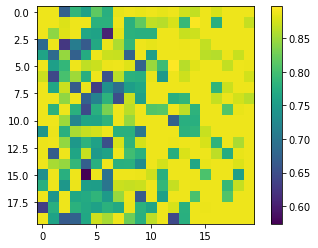

In [ ]:
plt.imshow(scoreM)
plt.colorbar()